# **Attrition Assignment**
# Steps Involved:


1.   Importing Data
2.   Data Treatment
3.Univariate Analysis
4.Visualization
5.Statistical Tests
6.Correlation Analysis



## Importing Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("general_data.csv") #importing dataset
display(dataset.head())
with pd.option_context('display.max_columns', 40):
  print(dataset[['MonthlyIncome','YearsAtCompany','Age','DistanceFromHome','PercentSalaryHike','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsSinceLastPromotion','TrainingTimesLastYear']].describe(include="all"))
data_yes=dataset[dataset['Attrition']=='Yes']
data_no=dataset[dataset['Attrition']=='No']

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


       MonthlyIncome  YearsAtCompany          Age  DistanceFromHome  \
count    4410.000000     4410.000000  4410.000000       4410.000000   
mean    65029.312925        7.008163    36.923810          9.192517   
std     47068.888559        6.125135     9.133301          8.105026   
min     10090.000000        0.000000    18.000000          1.000000   
25%     29110.000000        3.000000    30.000000          2.000000   
50%     49190.000000        5.000000    36.000000          7.000000   
75%     83800.000000        9.000000    43.000000         14.000000   
max    199990.000000       40.000000    60.000000         29.000000   

       PercentSalaryHike     JobLevel  NumCompaniesWorked  TotalWorkingYears  \
count        4410.000000  4410.000000         4391.000000        4401.000000   
mean           15.209524     2.063946            2.694830          11.279936   
std             3.659108     1.106689            2.498887           7.782222   
min            11.000000     1.000000   

# Data Treatment

In [3]:
print(dataset.isnull())
dataset.drop_duplicates
dataset.dropna(inplace=True)
display(dataset)

        Age  Attrition  ...  YearsSinceLastPromotion  YearsWithCurrManager
0     False      False  ...                    False                 False
1     False      False  ...                    False                 False
2     False      False  ...                    False                 False
3     False      False  ...                    False                 False
4     False      False  ...                    False                 False
...     ...        ...  ...                      ...                   ...
4405  False      False  ...                    False                 False
4406  False      False  ...                    False                 False
4407  False      False  ...                    False                 False
4408  False      False  ...                    False                 False
4409  False      False  ...                    False                 False

[4410 rows x 24 columns]


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2


# Encoding the data:

In [4]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
dataset['Attrition']=lab_enc.fit_transform(dataset['Attrition'])
dataset['BusinessTravel']=lab_enc.fit_transform(dataset['BusinessTravel'])
dataset['Department']=lab_enc.fit_transform(dataset['Department'])
dataset['EducationField']=lab_enc.fit_transform(dataset['EducationField'])
dataset['Gender']=lab_enc.fit_transform(dataset['Gender'])
dataset['JobRole']=lab_enc.fit_transform(dataset['JobRole'])
dataset['MaritalStatus']=lab_enc.fit_transform(dataset['MaritalStatus'])
display(dataset)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,1,0,1,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,1,6,2,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,4,7,1,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,3,1,1,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,1,7,2,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,2,2,4,3,4,1,4405,0,2,1,2,35390,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,0,2,1,5,4,3,1,4406,0,1,6,2,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,1,2,0,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,2,7,1,37020,0.0,Y,20,8,0,5.0,4,4,1,2


In [5]:
#Creating a table on factors that might affect attrition
df = dataset[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','MaritalStatus', 'JobLevel', 'JobRole', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
display(df)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,131160,1.0,11,1.0,6,1,0,0
1,31,1,1,1,10,1,1,2,1,6,41890,0.0,23,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,193280,1.0,15,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,83210,3.0,11,13.0,5,8,7,5
4,32,0,2,1,10,1,3,2,1,7,23420,4.0,12,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,2,2,4,3,4,2,2,1,35390,1.0,18,6.0,2,6,1,5
4405,42,0,2,1,5,4,3,2,1,6,60290,3.0,17,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,0,1,2,26790,2.0,15,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,2,7,37020,0.0,20,5.0,4,4,1,2


# Univariate Analysis

Mean

In [6]:
#Calculating mean
df.mean()

Age                           36.933364
Attrition                      0.160885
BusinessTravel                 1.607257
Department                     1.260840
DistanceFromHome               9.198996
Education                      2.912369
EducationField                 2.247147
MaritalStatus                  1.099270
JobLevel                       2.063898
JobRole                        4.459836
MonthlyIncome              65061.702419
NumCompaniesWorked             2.693291
PercentSalaryHike             15.210634
TotalWorkingYears             11.290278
TrainingTimesLastYear          2.798266
YearsAtCompany                 7.010497
YearsSinceLastPromotion        2.191693
YearsWithCurrManager           4.126198
dtype: float64

Median

In [7]:
#calculating median
df.median()

Age                           36.0
Attrition                      0.0
BusinessTravel                 2.0
Department                     1.0
DistanceFromHome               7.0
Education                      3.0
EducationField                 2.0
MaritalStatus                  1.0
JobLevel                       2.0
JobRole                        5.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

Mode

In [8]:
df.mode()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,0,2,1,2,3,1,1,1,7,23420,1.0,11,10.0,2,5,0,2


Variance

In [9]:
df.var()

Age                        8.348974e+01
Attrition                  1.350321e-01
BusinessTravel             4.430699e-01
Department                 2.782150e-01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
EducationField             1.768395e+00
MaritalStatus              5.322569e-01
JobLevel                   1.223490e+00
JobRole                    6.056706e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

Skew

In [10]:
#finding skewness
df_skew=pd.DataFrame(df.skew(),columns=["Skew"])
df_skew

,Skew
Age,0.413048
Attrition,1.846529
BusinessTravel,-1.437507
Department,0.173436
DistanceFromHome,0.955517
Education,-0.288977
EducationField,0.550083
MaritalStatus,-0.155093
JobLevel,1.021797
JobRole,-0.357663


Age, Education and TrainingTimesLastYear are having skewness between -0.5 and 0.5 hence, they are approximately symmetrical

Distribution Plot:

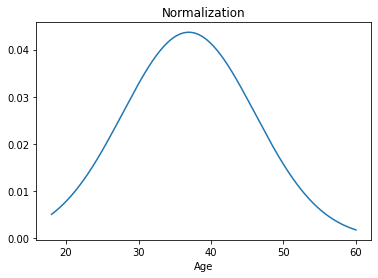

In [12]:
from scipy.stats import norm
#normal distribution of Age
domain=np.linspace(df['Age'].min(),df['Age'].max(),df['Age'].count())
plt.plot(domain,norm.pdf(domain,df['Age'].mean(),df['Age'].std()))
plt.title("Normalization")
plt.xlabel("Age")
plt.show()

(array([169., 314., 666., 792., 759., 644., 392., 276., 230., 140.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

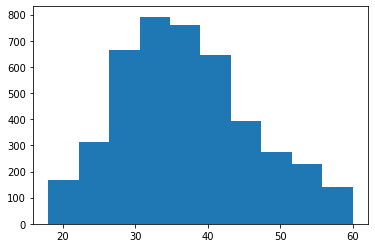

In [18]:
plt.hist(df['Age'])

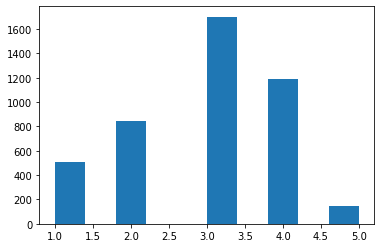

In [13]:

plt.hist(df['Education'])
plt.show()

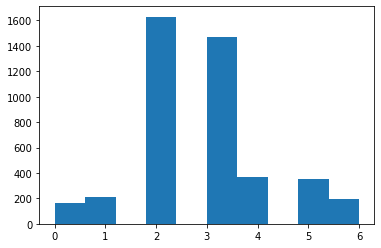

In [14]:
plt.hist(df['TrainingTimesLastYear'])
plt.show()

Kurtosis:

In [15]:
df_kurt = pd.DataFrame(df.kurt(), columns = ['Kurtosis'])
df_kurt

,Kurtosis
Age,-0.409517
Attrition,1.410313
BusinessTravel,0.695632
Department,-0.394980
DistanceFromHome,-0.230691
Education,-0.565008
EducationField,-0.687173
MaritalStatus,-1.112941
JobLevel,0.388189
JobRole,-1.194397


Outliers:

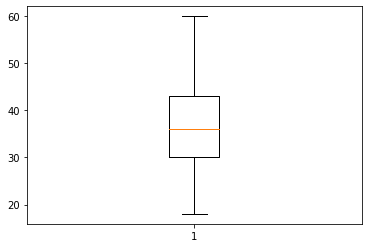

In [16]:
plt.boxplot(df['Age'])
plt.show()

From above box plot we can say that age is normally disributed and has no Outliers

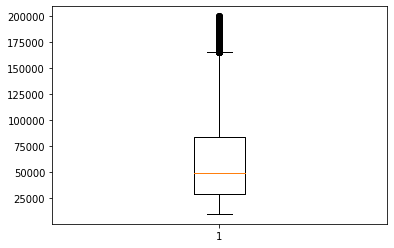

In [17]:

plt.boxplot(df['MonthlyIncome'])
plt.show()

From above box plot we can say that MonthlyIncome has more no of outliers and positively skewed to the right

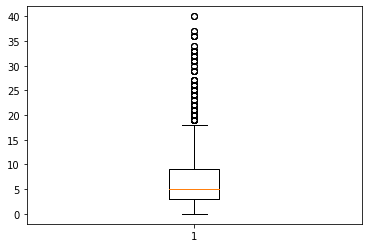

In [20]:
plt.boxplot(df['YearsAtCompany'])
plt.show()

From above box plot we can say that YearsAtCompany is Right Skewed with several outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f92c5992748>],
 'caps': [<matplotlib.lines.Line2D at 0x7f92c599c198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92c599cc18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f92c599c898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f92c5992a58>,
  <matplotlib.lines.Line2D at 0x7f92c5992dd8>]}

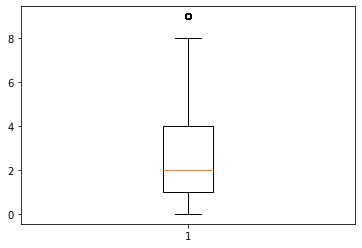

In [27]:
plt.boxplot(df['NumCompaniesWorked'])

# **Data Visualization**

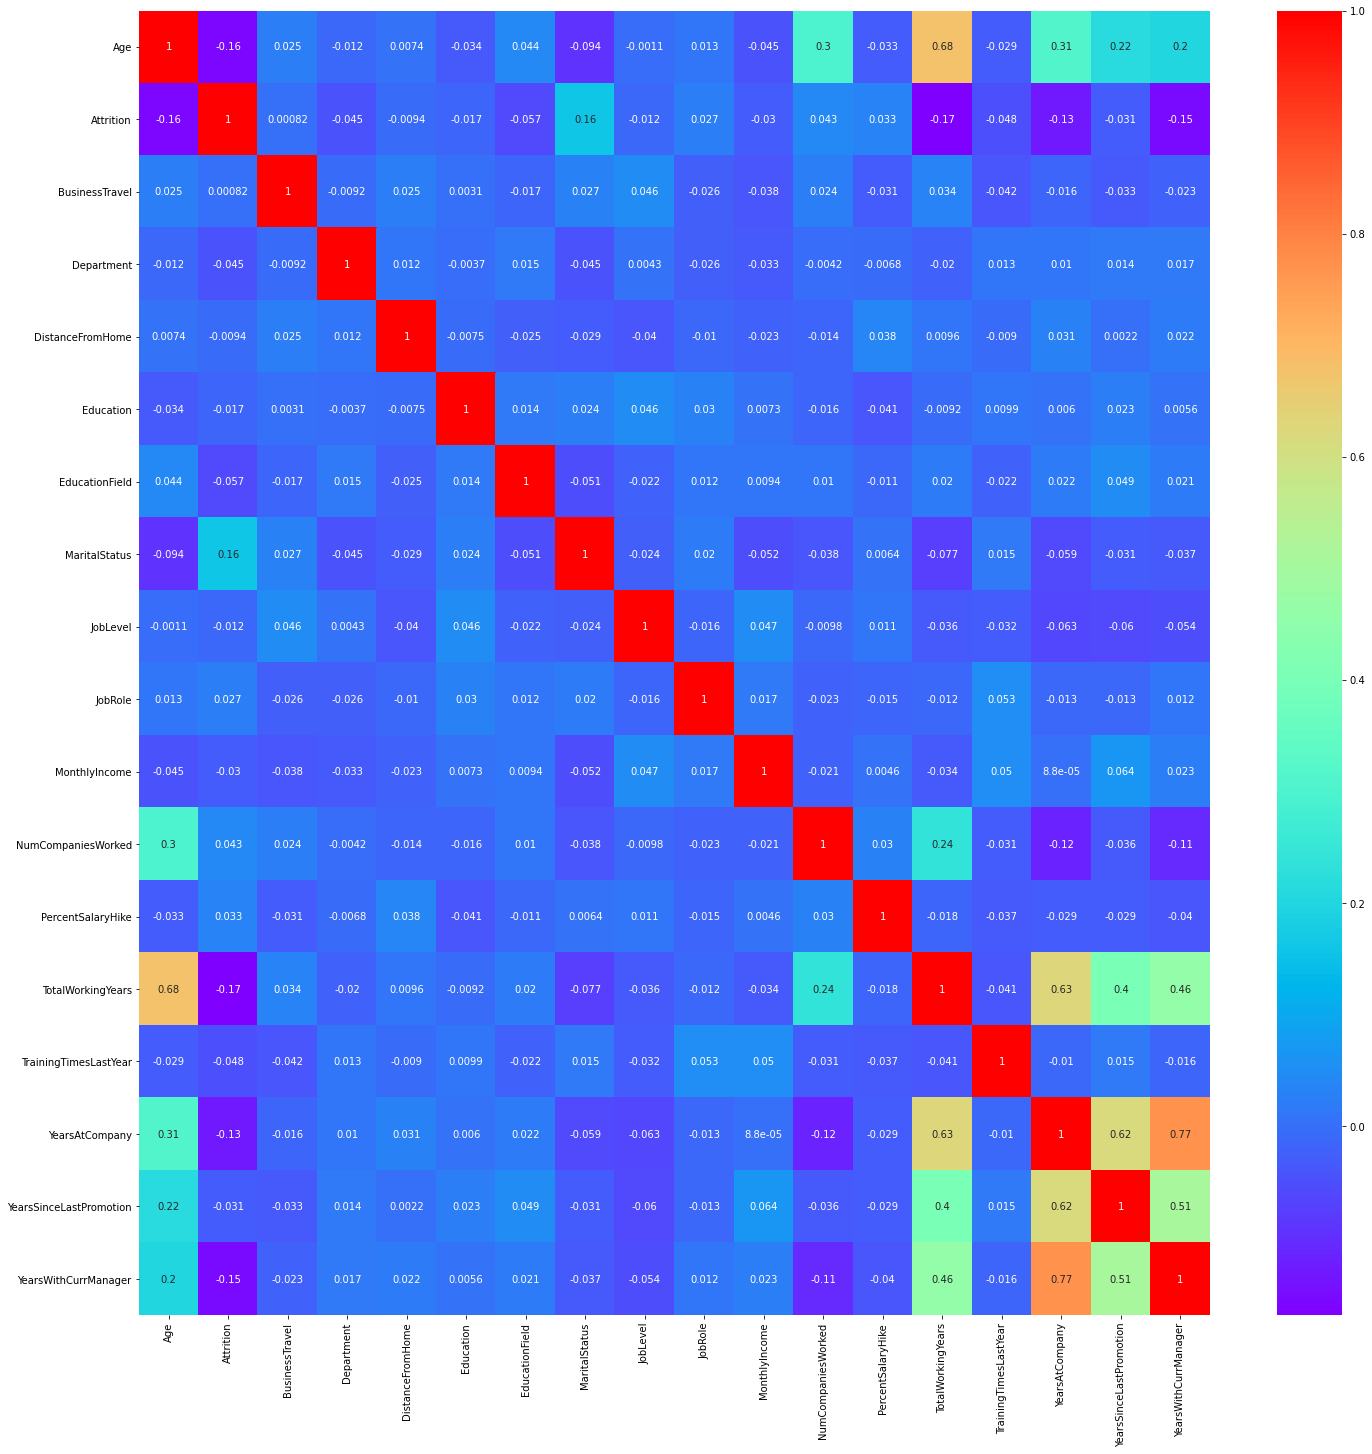

In [78]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),cmap='rainbow',annot=True)
plt.show()

JobRole Plot

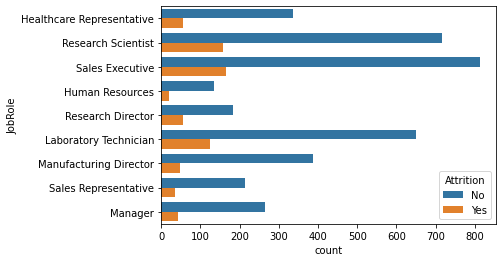

In [84]:
sns.countplot(y="JobRole", hue="Attrition", data=dataset)
plt.show()

Department Plot

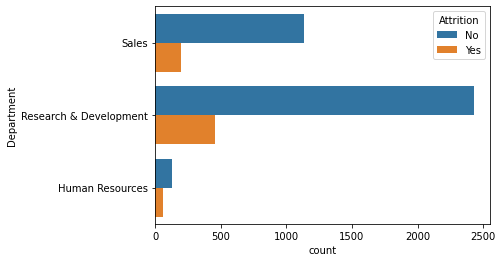

In [86]:
sns.countplot(y="Department", hue="Attrition", data=dataset)
plt.show()

Business Travel Plot




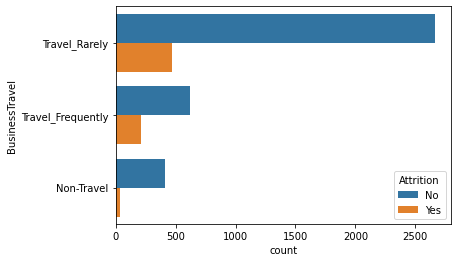

In [87]:

sns.countplot(y="BusinessTravel", hue="Attrition", data=dataset)
plt.show()

Gender Plot

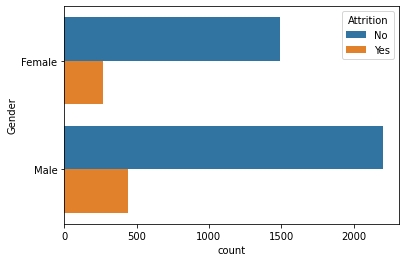

In [88]:
sns.countplot(y="Gender", hue="Attrition", data=dataset)
plt.show()

Education Field Plot

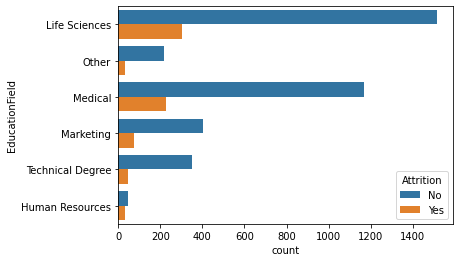

In [90]:
sns.countplot(y="EducationField", hue="Attrition", data=dataset)
plt.show()

# **Statistical Tests**

# MannWhitney Tests:

In [21]:
#Here we are comparing two Independent samples
con = df[['Age', 'DistanceFromHome', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [22]:
from scipy.stats import mannwhitneyu
def mwtest(name):
  print(f"{name} with Attrition")
  print(f"\t Null Hypothesis=There is no significant difference in attrition_yes_{name} with attrition_no_{name}")
  print(f"\tAlternative Hypothesis=There is significant difference in attrition_yes{name} with attrition_no{name}\n")
  print("\tPerforming mannwhitney test to obtain p value")
  stats,p=mannwhitneyu(data_yes[name],data_no[name])
  print("\t",p)
  if(p<0.05):
    print(f"\tReject the Nulll hypothesis,Hence there is significant difference in {name} between attrition Yes and No")
  else:
    print(f"\tAccept the Null hypothesis,Hence there is no significant difference in {name} between attrition Yes and No")
  print("\n")

In [25]:
col=list(con.columns)
for name in col:
  mwtest(name)

Age with Attrition
	 Null Hypothesis=There is no significant difference in attrition_yes_Age with attrition_no_Age
	Alternative Hypothesis=There is significant difference in attrition_yesAge with attrition_noAge

	Performing mannwhitney test to obtain p value
	 2.9951588479067175e-30
	Reject the Nulll hypothesis,Hence there is significant difference in Age between attrition Yes and No


DistanceFromHome with Attrition
	 Null Hypothesis=There is no significant difference in attrition_yes_DistanceFromHome with attrition_no_DistanceFromHome
	Alternative Hypothesis=There is significant difference in attrition_yesDistanceFromHome with attrition_noDistanceFromHome

	Performing mannwhitney test to obtain p value
	 0.4629185205822659
	Accept the Null hypothesis,Hence there is no significant difference in DistanceFromHome between attrition Yes and No


MonthlyIncome with Attrition
	 Null Hypothesis=There is no significant difference in attrition_yes_MonthlyIncome with attrition_no_MonthlyIncome

# Inference:


*   There is significant difference in Age between attrition Yes and No

*   There is significant difference in attrition_yesNumCompaniesWorked with attrition_noNumCompaniesWorked
*There is significant difference in NumCompaniesWorked between attrition Yes and No
* There is significant difference in PercentSalaryHike between attrition Yes and No
*There is significant difference in TotalWorkingYears between attrition Yes and No
*There is significant difference in TrainingTimesLastYear between attrition Yes and No
*There is significant difference in YearsAtCompany between attrition Yes and No
*There is significant difference in YearsSinceLastPromotion between attrition Yes and No
*There is significant difference in YearsWithCurrManager between attrition Yes and No





# Independent T Test

In [93]:
#Checking affect of attrition of employees for lower job_level and higher job_level
print("H0: There is no significant difference in attrition of employees with lower job_level and higher job_level")
print("Ha:There is significant difference in attrition of employees with lower job_level and higher job_level")
jb_lev_1=data_yes[data_yes['JobLevel']<=2]
jb_lev_2=data_yes[data_yes['JobLevel']>2]
from scipy.stats import ttest_ind
stats,p=ttest_ind(jb_lev_1["JobLevel"],jb_lev_2["JobLevel"])
print(stats,p)
if(p<0.05):
  print("Reject null hypothesis,Hence there is significant difference in attrition of employees with lower job_level and higher job_level ")
else:
  print("Accept null hypothesis,Hence there is no significant difference in attrition of employees with lower job_level and higher job_level")

H0: There is no significant difference in attrition of employees with lower job_level and higher job_level
Ha:There is significant difference in attrition of employees with lower job_level and higher job_level
-41.77461670346038 2.434278190234009e-193
Reject null hypothesis,Hence there is significant difference in attrition of employees with lower job_level and higher job_level 


In [92]:
#Checking affect of attrition of employees for yearsatcompany less than 7 years and greater than 7 years
print("H0:There is no significant difference in attrition of employees with years at the company less than 7 years and more than 7 years")
print("Ha:There is significant difference in attrition of employees with years at the company less than 7 years and more than 7 years")
yearscomp1=data_yes[data_yes['YearsAtCompany']<=7]
yearscomp2=data_yes[data_yes['YearsAtCompany']>7]
stats,p=ttest_ind(yearscomp1['YearsAtCompany'],yearscomp2['YearsAtCompany'])
print(stats,p)
if p<0.05:
  print("Reject Null Hypothesis,Hence there is significant difference in attrition of employees with years at the company less than 7 years and more than 7 years")
else:
  print("Accept Null Hypothesis,Hence there is no significant difference in attrition of employees with years at the company less than 7 years and more than 7 years")

H0:There is no significant difference in attrition of employees with years at the company less than 7 years and more than 7 years
Ha:There is significant difference in attrition of employees with years at the company less than 7 years and more than 7 years
-30.707163755502485 2.3649637620928476e-132
Reject Null Hypothesis,Hence there is significant difference in attrition of employees with years at the company less than 7 years and more than 7 years


In [94]:
#Checking affect of attrition of employees for TotalWorkingYears less than 10 and greater than 10
print("H0:There is no signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10")
print("Ha:There is signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10")
t_w_y1=data_yes[data_yes['TotalWorkingYears']<10]
t_w_y2=data_yes[data_yes['TotalWorkingYears']>=10]
stats,p=ttest_ind(t_w_y1['TotalWorkingYears'],t_w_y2['TotalWorkingYears'])
print(stats,p)
if p<0.05:
  print("Reject null hypothesis,Hence there is signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10")
else:
   print("Accept null hypothesis,Hence there is no signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10")

H0:There is no signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10
Ha:There is signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10
-30.628770159392115 8.757044604724673e-132
Reject null hypothesis,Hence there is signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10


# Inference: 


*   There is significant difference in attrition of employees with lower job_level and higher job_level
*    There is significant difference in attrition of employees with years at the company less than 7 years and more than 7 years
*There is signicant difference of attrition of employees with TotalWorkingYears less than 10 years and greater than 10 years




# Chi Square Test

In [46]:
import scipy.stats as stats
import seaborn as sns
from scipy.stats import chi2_contingency
def chi(name):
  print(f"Chi square test to find the dependency between {name} and Attrition")
  table=pd.crosstab(dataset[name],dataset['Attrition'])
  print("\nTable:\n\n",table)
  stats,p,dof,expected=chi2_contingency(table)
  print("Value of p is\n",p)
  if p<0.05:
    print(f"Reject Null Hypothesis,Hence there is dependency between {name} and Attrition")
  else:
    print(f"Accept Null Hypothesis,Hence there is no dependency between {name} and Attrition")

In [47]:
chi('Gender')

Chi square test to find the dependency between Gender and Attrition

Table:

 Attrition    No  Yes
Gender              
Female     1494  270
Male       2205  441
Value of p is
 0.24529482862926827
Accept Null Hypothesis,Hence there is no dependency between Gender and Attrition


In [48]:
chi('BusinessTravel')

Chi square test to find the dependency between BusinessTravel and Attrition

Table:

 Attrition            No  Yes
BusinessTravel              
Non-Travel          414   36
Travel_Frequently   624  207
Travel_Rarely      2661  468
Value of p is
 1.764276972983189e-16
Reject Null Hypothesis,Hence there is dependency between BusinessTravel and Attrition


In [49]:
chi('Education')


Chi square test to find the dependency between Education and Attrition

Table:

 Attrition    No  Yes
Education           
1           432   78
2           687  159
3          1449  267
4          1008  186
5           123   21
Value of p is
 0.22759826301782393
Accept Null Hypothesis,Hence there is no dependency between Education and Attrition


In [50]:
chi('Department')

Chi square test to find the dependency between Department and Attrition

Table:

 Attrition                 No  Yes
Department                       
Human Resources          132   57
Research & Development  2430  453
Sales                   1137  201
Value of p is
 4.820888218170407e-07
Reject Null Hypothesis,Hence there is dependency between Department and Attrition


In [51]:
chi('MaritalStatus')

Chi square test to find the dependency between MaritalStatus and Attrition

Table:

 Attrition        No  Yes
MaritalStatus           
Divorced        882   99
Married        1767  252
Single         1050  360
Value of p is
 8.45385940605786e-31
Reject Null Hypothesis,Hence there is dependency between MaritalStatus and Attrition


In [52]:
chi('StockOptionLevel')

Chi square test to find the dependency between StockOptionLevel and Attrition

Table:

 Attrition           No  Yes
StockOptionLevel           
0                 1575  318
1                 1518  270
2                  390   84
3                  216   39
Value of p is
 0.38454683657380506
Accept Null Hypothesis,Hence there is no dependency between StockOptionLevel and Attrition


# Inference:


* There is dependency between BusinessTravel and Attrition
*There is dependency between Department and Attrition
*There is dependency between MaritalStatus and Attrition



**Correlation Analysis**

In [72]:
from scipy.stats import pearsonr
def corr_an (column):
    print(f"Correlation Analysis of Attrition vs {column}:\n")
    print(f"\tH0: There is no significant relation between Attrition and {column}")
    print(f"\tH1: There is significant relation between Attrition and {column}\n")
    corr_, p = pearsonr(df['Attrition'], df[column])
    corr_ = round(corr_, 3)
    p = round(corr_, 3)
    
    
    if p > 0.05:
        print(f"\n\tHere, the P value of {p} is > 0.05 so we are accepting H0 \n\tHence there is no significant correlation between Attrition and {column}")
    else:
        print(f"\n\tHere, the P value of {p} is < 0.05 so we are rejecting H0 \n\tHence there is significant correlation between Attrition and {column}") 
    print("\n----------\n")

In [73]:
corr = dataset[['Age', 'DistanceFromHome','BusinessTravel','Department','MaritalStatus','MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
for name in corr:
  corr_an(name)

Correlation Analysis of Attrition vs Age:

	H0: There is no significant relation between Attrition and Age
	H1: There is significant relation between Attrition and Age


	Here, the P value of -0.158 is < 0.05 so we are rejecting H0 
	Hence there is significant correlation between Attrition and Age

----------

Correlation Analysis of Attrition vs DistanceFromHome:

	H0: There is no significant relation between Attrition and DistanceFromHome
	H1: There is significant relation between Attrition and DistanceFromHome


	Here, the P value of -0.009 is < 0.05 so we are rejecting H0 
	Hence there is significant correlation between Attrition and DistanceFromHome

----------

Correlation Analysis of Attrition vs BusinessTravel:

	H0: There is no significant relation between Attrition and BusinessTravel
	H1: There is significant relation between Attrition and BusinessTravel


	Here, the P value of 0.001 is < 0.05 so we are rejecting H0 
	Hence there is significant correlation between Attrition a